In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1> Load Data

In [2]:
df = pd.read_csv('PowerLoad_Dataset.csv')
df.head()

,Timestamp,Power_Load_kW,Temperature_C,Humidity_%,WindSpeed_mps,Precipitation_mm,DayOfWeek,HolidayFlag,Daily_PostDispatch_Load,Weekly_PreDispatch_Projection
0,2018-01-01 01:00:00,493.09,20.47,66.90,10.35,0.51,1,0,508.96,519.14
1,2018-01-01 04:00:00,488.29,27.66,58.72,7.86,0.02,1,0,522.95,533.41
2,2018-01-01 07:00:00,538.37,15.35,36.77,4.67,0.05,1,0,527.55,538.10
3,2018-01-01 13:00:00,404.34,22.89,83.71,11.05,0.22,1,0,506.71,516.85
4,2018-01-02 14:00:00,433.59,20.38,43.12,0.51,0.18,2,0,481.05,498.31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      10000 non-null  object 
 1   Power_Load_kW                  10000 non-null  float64
 2   Temperature_C                  10000 non-null  float64
 3   Humidity_%                     10000 non-null  float64
 4   WindSpeed_mps                  10000 non-null  float64
 5   Precipitation_mm               10000 non-null  float64
 6   DayOfWeek                      10000 non-null  int64  
 7   HolidayFlag                    10000 non-null  int64  
 8   Daily_PostDispatch_Load        10000 non-null  float64
 9   Weekly_PreDispatch_Projection  10000 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 781.4+ KB


In [5]:
df.describe()

,Power_Load_kW,Temperature_C,Humidity_%,WindSpeed_mps,Precipitation_mm,DayOfWeek,HolidayFlag,Daily_PostDispatch_Load,Weekly_PreDispatch_Projection
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,499.397814,25.022674,60.126286,7.516845,0.202565,3.982500,0.285400,500.112020,509.946114
std,49.880756,7.026358,17.334169,4.346676,0.204053,2.010771,0.451627,10.137719,3.916816
min,308.170000,-5.000000,30.000000,0.000000,0.000000,1.000000,0.000000,463.760000,493.590000
25%,465.467500,20.200000,45.077500,3.757500,0.060000,2.000000,0.000000,493.330000,507.370000
50%,499.985000,25.050000,60.230000,7.560000,0.140000,4.000000,0.000000,500.110000,510.030000
75%,532.900000,29.690000,74.960000,11.270000,0.280000,6.000000,1.000000,506.770000,512.570000
max,680.570000,45.000000,89.990000,15.000000,2.160000,7.000000,1.000000,539.850000,538.100000


UNIVARIATE ANALYSIS


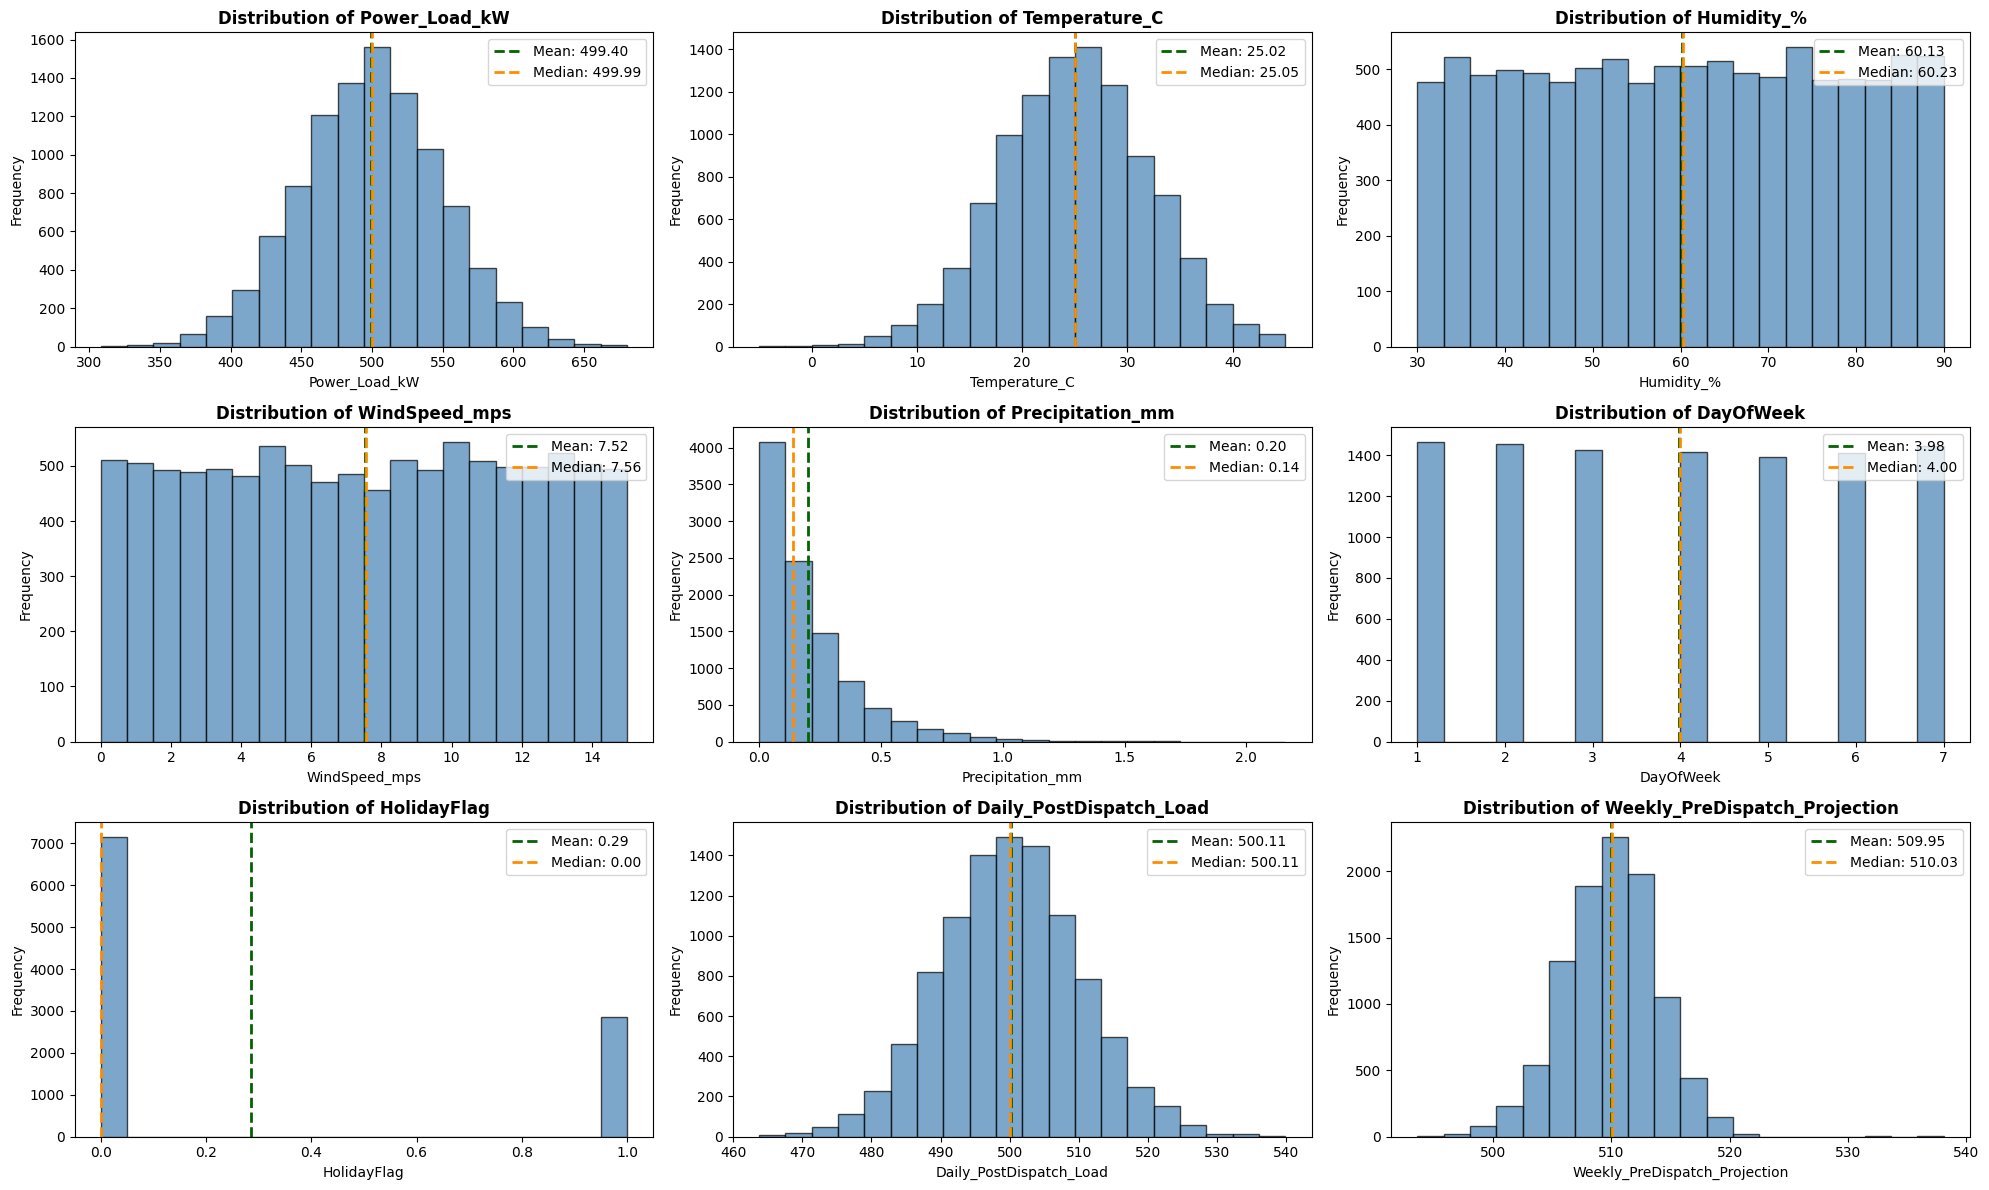


Skewness of Numerical Features:
Precipitation_mm                 2.053275
HolidayFlag                      0.950531
Daily_PostDispatch_Load          0.039587
DayOfWeek                        0.015177
Humidity_%                      -0.006008
WindSpeed_mps                   -0.013491
Power_Load_kW                   -0.023213
Temperature_C                   -0.036137
Weekly_PreDispatch_Projection   -0.108380
dtype: float64


In [6]:
print("UNIVARIATE ANALYSIS")

# Get numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Check if there are numeric columns
if len(numeric_cols) == 0:
    print("No numerical columns found in the dataframe!")
else:
    n_features = len(numeric_cols)
    ncols = 3
    nrows = max(1, int(np.ceil(n_features / ncols)))  # Ensure at least 1 row
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, nrows * 4))
    axes = axes.ravel()
    
    for idx, col in enumerate(numeric_cols):
        axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend()
    
    for j in range(n_features, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    print("\nSkewness of Numerical Features:")
    skewness = df[numeric_cols].skew().sort_values(ascending=False)
    print(skewness)



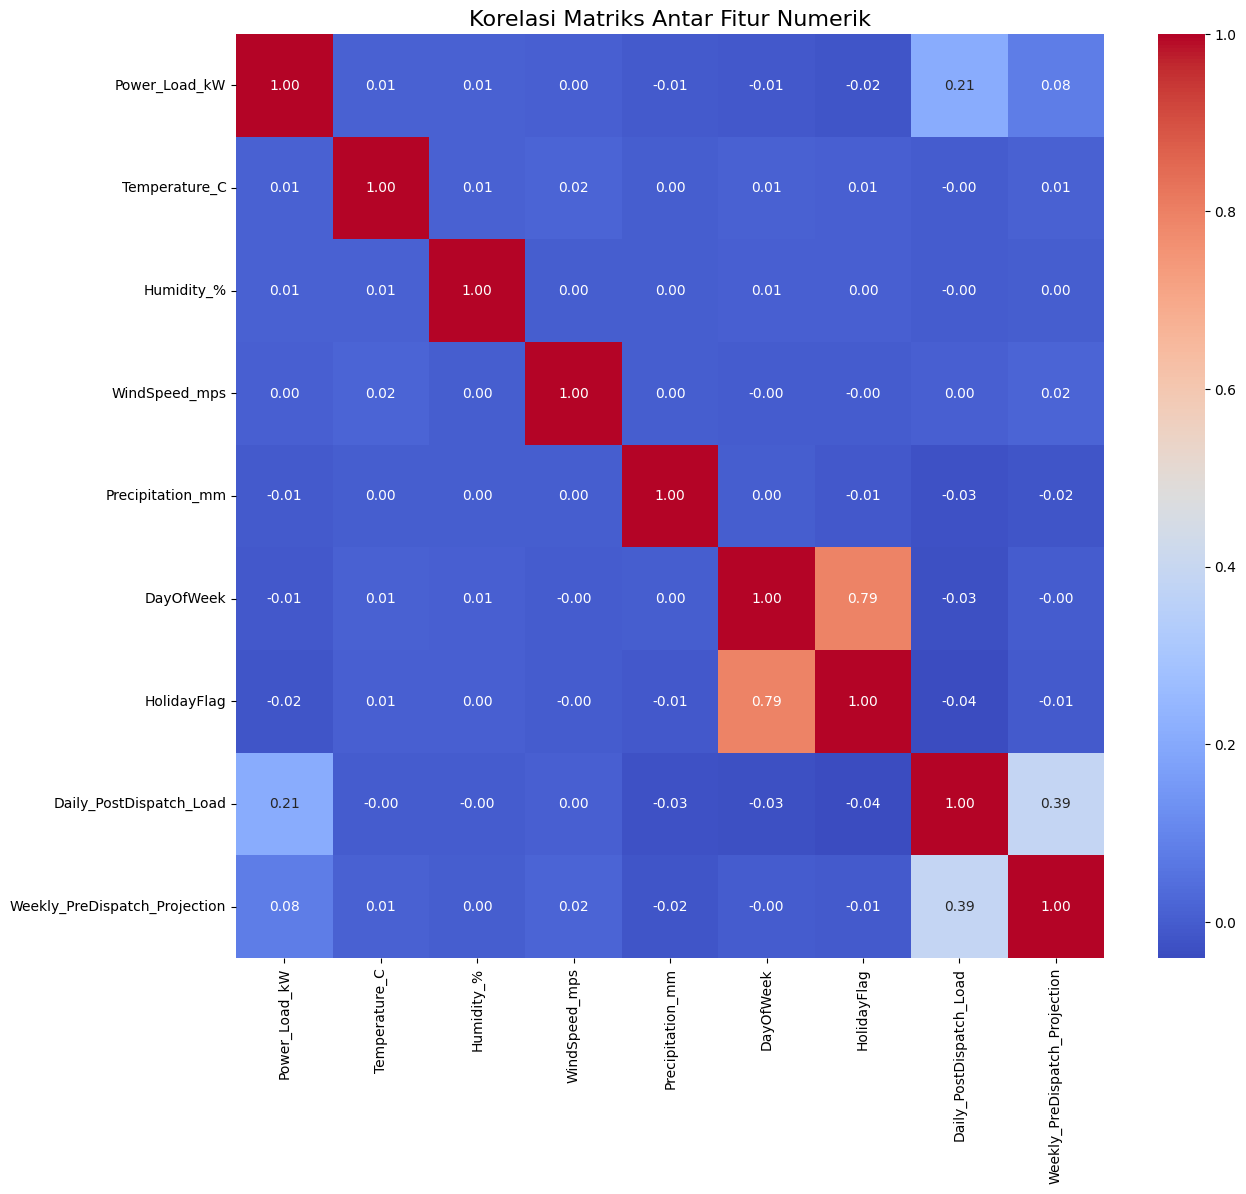

In [7]:
korelasi = df[numeric_cols].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(korelasi, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Matriks Antar Fitur Numerik", fontsize=16)
plt.show()

In [8]:
print("MULTICOLLINEARITY DETECTION")

high_corr_pairs = []
for i in range(len(korelasi.columns)):
    for j in range(i+1, len(korelasi.columns)):
        if abs(korelasi.iloc[i, j]) > 0.7:  
            high_corr_pairs.append({
                'Feature 1': korelasi.columns[i],
                'Feature 2': korelasi.columns[j],
                'Correlation': korelasi.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    print(high_corr_df)
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.7)")



MULTICOLLINEARITY DETECTION

Highly Correlated Feature Pairs (|correlation| > 0.7):
   Feature 1    Feature 2  Correlation
0  DayOfWeek  HolidayFlag     0.793141


In [3]:
df.isnull().sum()

Timestamp                        0
Power_Load_kW                    0
Temperature_C                    0
Humidity_%                       0
WindSpeed_mps                    0
Precipitation_mm                 0
DayOfWeek                        0
HolidayFlag                      0
Daily_PostDispatch_Load          0
Weekly_PreDispatch_Projection    0
dtype: int64

Number of unique Daily_PostDispatch_Load values per day (Head):
Date
2018-01-01    4
2018-01-02    2
2018-01-03    5
2018-01-04    2
2018-01-05    7
2018-01-06    1
2018-01-07    5
2018-01-08    6
2018-01-09    7
2018-01-10    6
Name: Daily_PostDispatch_Load, dtype: int64
Max unique values per day: 12

Correlation Matrix:
                         Power_Load_kW  Daily_PostDispatch_Load
WindSpeed_mps                 0.004666                 0.004784
Precipitation_mm             -0.007047                -0.025126
Temperature_C                 0.008698                -0.000294
DayOfWeek                    -0.010762                -0.030323
HolidayFlag                  -0.018661                -0.040814
Power_Load_kW                 1.000000                 0.209120
Daily_PostDispatch_Load       0.209120                 1.000000


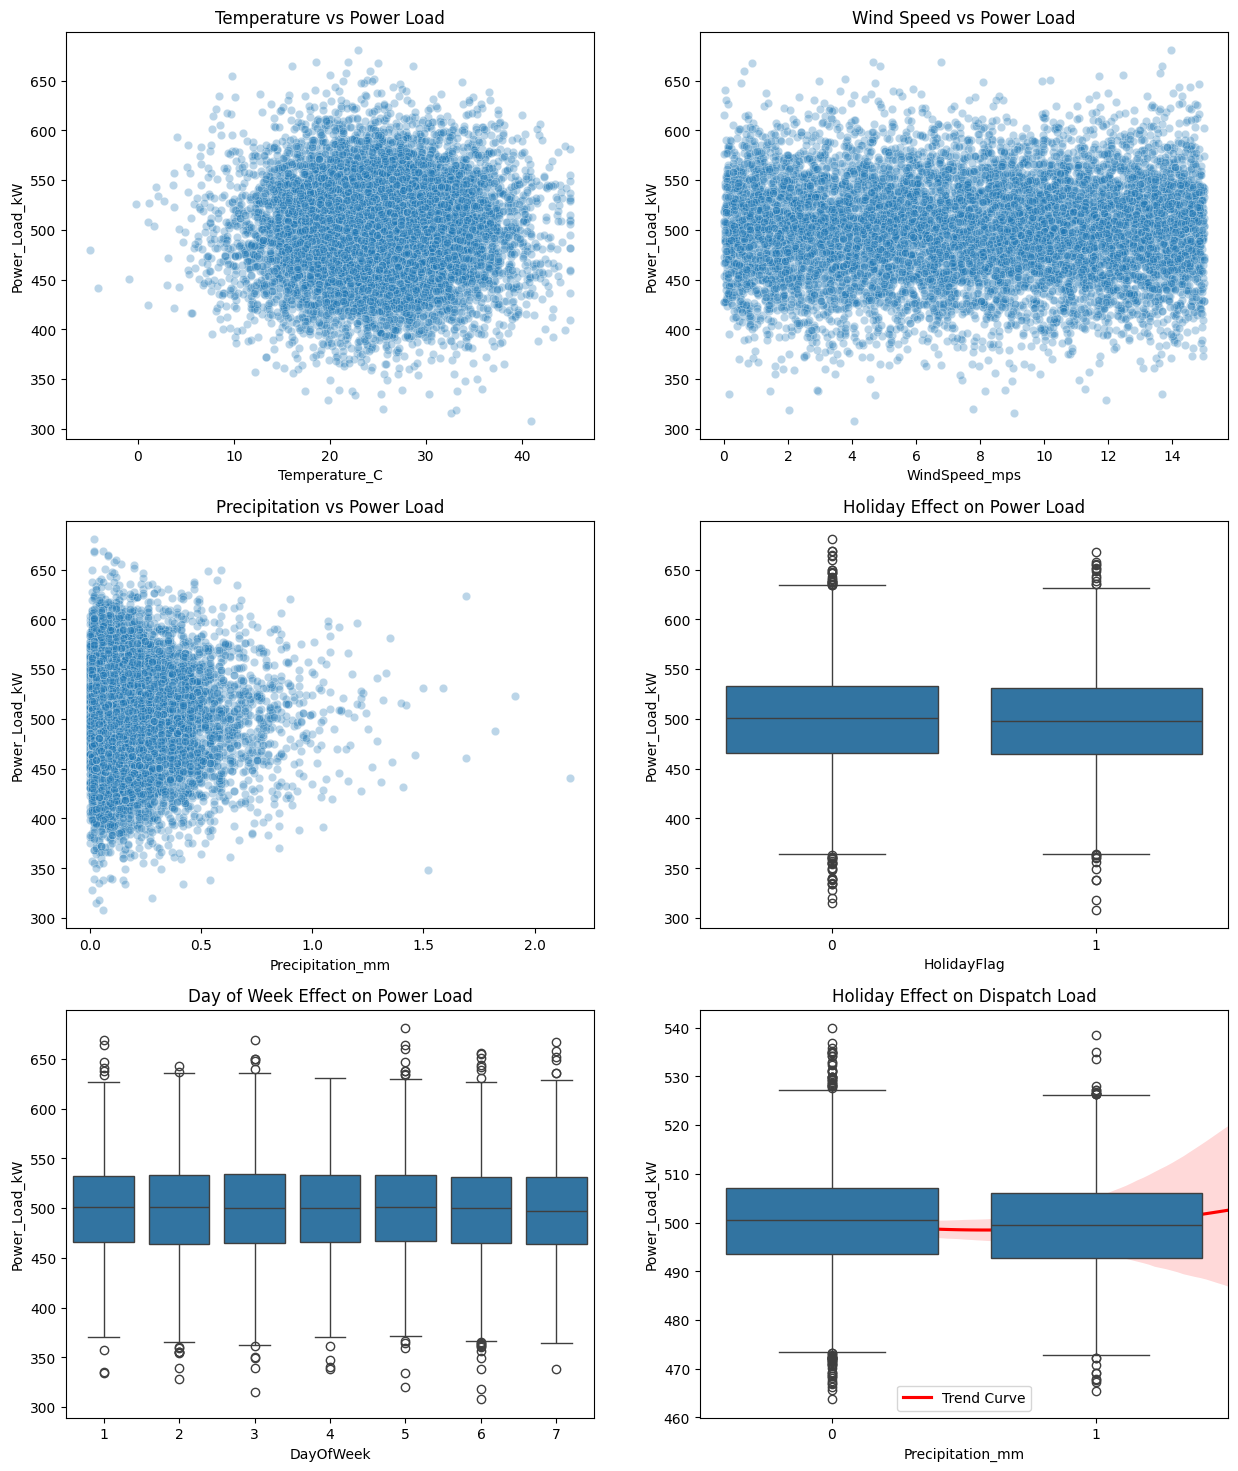

In [27]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date

daily_consistency = df.groupby('Date')['Daily_PostDispatch_Load'].nunique()
print("Number of unique Daily_PostDispatch_Load values per day (Head):")
print(daily_consistency.head(10))
print(f"Max unique values per day: {daily_consistency.max()}")

# 2. Pattern Analysis
features_to_analyze = ['WindSpeed_mps', 'Precipitation_mm', 'Temperature_C', 'DayOfWeek', 'HolidayFlag']
targets = ['Power_Load_kW', 'Daily_PostDispatch_Load']

# Correlation
print("\nCorrelation Matrix:")
print(df[features_to_analyze + targets].corr()[targets])

# Visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

# Plot 1: Temperature vs Power_Load_kW
sns.scatterplot(x='Temperature_C', y='Power_Load_kW', data=df, ax=axes[0], alpha=0.3)
axes[0].set_title('Temperature vs Power Load')

# Plot 2: WindSpeed vs Power_Load_kW
sns.scatterplot(x='WindSpeed_mps', y='Power_Load_kW', data=df, ax=axes[1], alpha=0.3)
axes[1].set_title('Wind Speed vs Power Load')

# Plot 3: Precipitation vs Power_Load_kW
sns.scatterplot(x='Precipitation_mm', y='Power_Load_kW', data=df, ax=axes[2], alpha=0.3)
sns.regplot(x=df['Precipitation_mm'], y=df['Power_Load_kW'], scatter=False, order=2, color='red', label='Trend Curve')
axes[2].set_title('Precipitation vs Power Load')

# Plot 4: HolidayFlag vs Power_Load_kW
sns.boxplot(x='HolidayFlag', y='Power_Load_kW', data=df, ax=axes[3])
axes[3].set_title('Holiday Effect on Power Load')

# Plot 5: DayOfWeek vs Power_Load_kW
sns.boxplot(x='DayOfWeek', y='Power_Load_kW', data=df, ax=axes[4])
axes[4].set_title('Day of Week Effect on Power Load')

# Plot 6: HolidayFlag vs Daily_PostDispatch_Load (To see if dispatch accounts for holidays)
sns.boxplot(x='HolidayFlag', y='Daily_PostDispatch_Load', data=df, ax=axes[5])
axes[5].set_title('Holiday Effect on Dispatch Load')

plt.show()

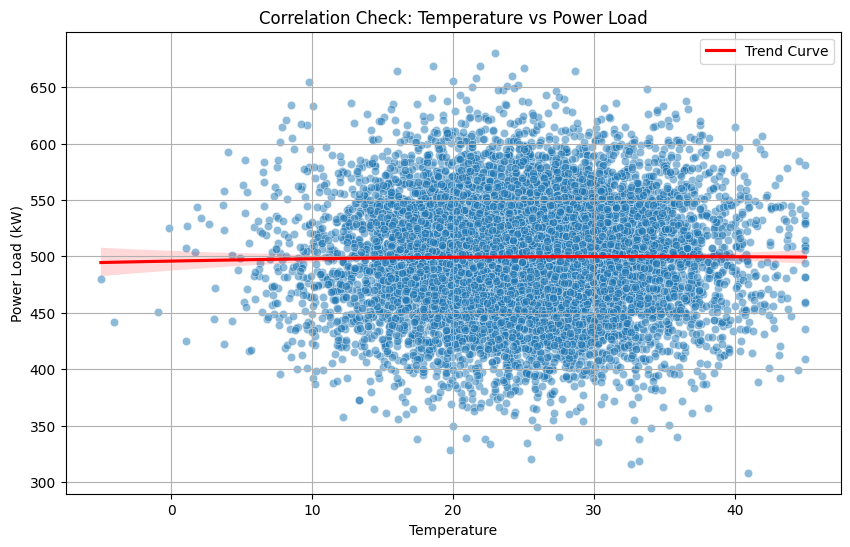

In [14]:
# 2. Create the Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature_C'], y=df['Power_Load_kW'], alpha=0.5)

# 3. Add a trend line to see if it's curved (Polynomial order 2)
sns.regplot(x=df['Temperature_C'], y=df['Power_Load_kW'], scatter=False, order=2, color='red', label='Trend Curve')

plt.title('Correlation Check: Temperature vs Power Load')
plt.xlabel('Temperature')
plt.ylabel('Power Load (kW)')
plt.legend()
plt.grid(True)
plt.show()

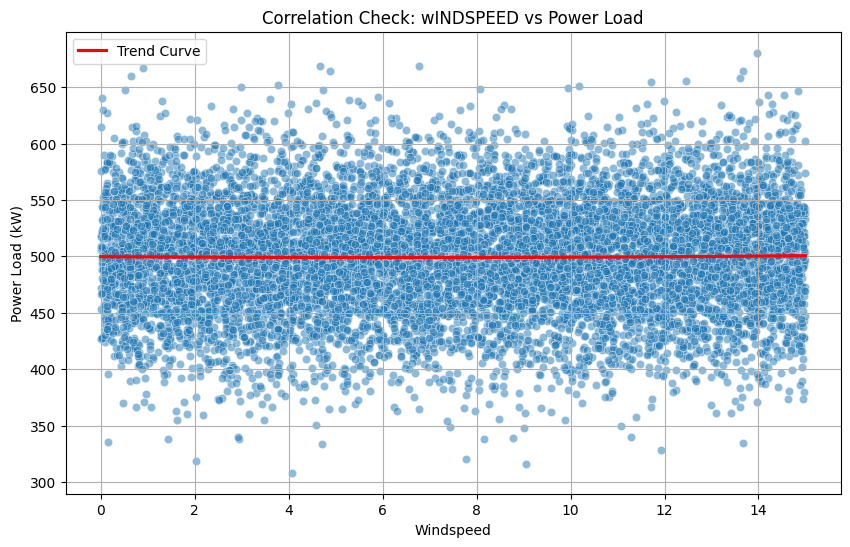

In [26]:
# 2. Create the Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['WindSpeed_mps'], y=df['Power_Load_kW'], alpha=0.5)

# 3. Add a trend line to see if it's curved (Polynomial order 2)
sns.regplot(x=df['WindSpeed_mps'], y=df['Power_Load_kW'], scatter=False, order=2, color='red', label='Trend Curve')

plt.title('Correlation Check: wINDSPEED vs Power Load')
plt.xlabel('Windspeed')
plt.ylabel('Power Load (kW)')
plt.legend()
plt.grid(True)
plt.show()

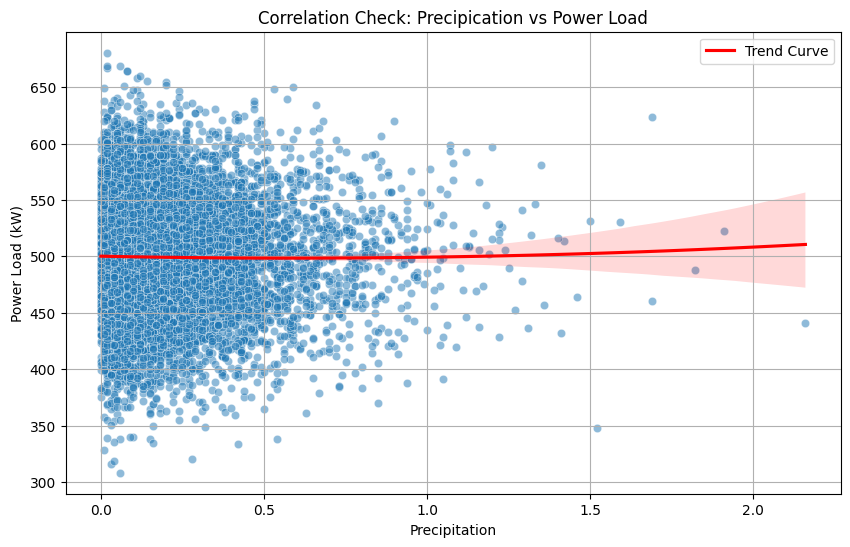

In [25]:
# 2. Create the Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Precipitation_mm'], y=df['Power_Load_kW'], alpha=0.5)

# 3. Add a trend line to see if it's curved (Polynomial order 2)
sns.regplot(x=df['Precipitation_mm'], y=df['Power_Load_kW'], scatter=False, order=2, color='red', label='Trend Curve')

plt.title('Correlation Check: Precipication vs Power Load')
plt.xlabel('Precipitation')
plt.ylabel('Power Load (kW)')
plt.legend()
plt.grid(True)
plt.show()

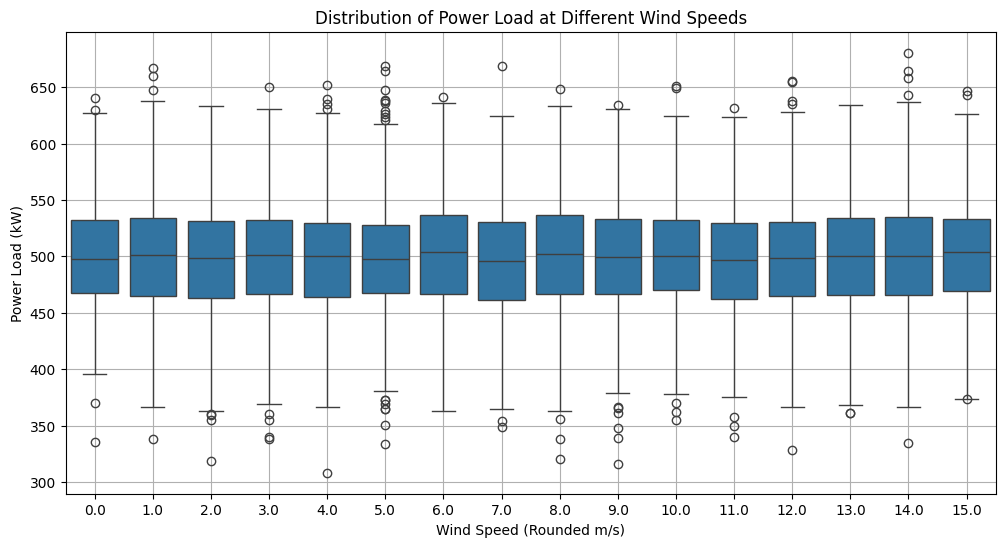

In [18]:
# Convert WindSpeed to whole numbers just for plotting (to group them)
# This helps if your data is slightly decimal like 1.0, 1.1, etc.
df['Wind_Rounded'] = df['WindSpeed_mps'].round(0)

plt.figure(figsize=(12, 6))
# Using a Boxplot to see the distribution inside the "lines"
sns.boxplot(x='Wind_Rounded', y='Power_Load_kW', data=df)

plt.title('Distribution of Power Load at Different Wind Speeds')
plt.xlabel('Wind Speed (Rounded m/s)')
plt.ylabel('Power Load (kW)')
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_18748\2682397257.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precip_Category', y='Power_Load_kW', data=df, ax=axes[0], palette="Blues", errorbar=None)
C:\Users\user\AppData\Local\Temp\ipykernel_18748\2682397257.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wind_Category', y='Power_Load_kW', data=df, ax=axes[1], palette="Greens", errorbar=None)


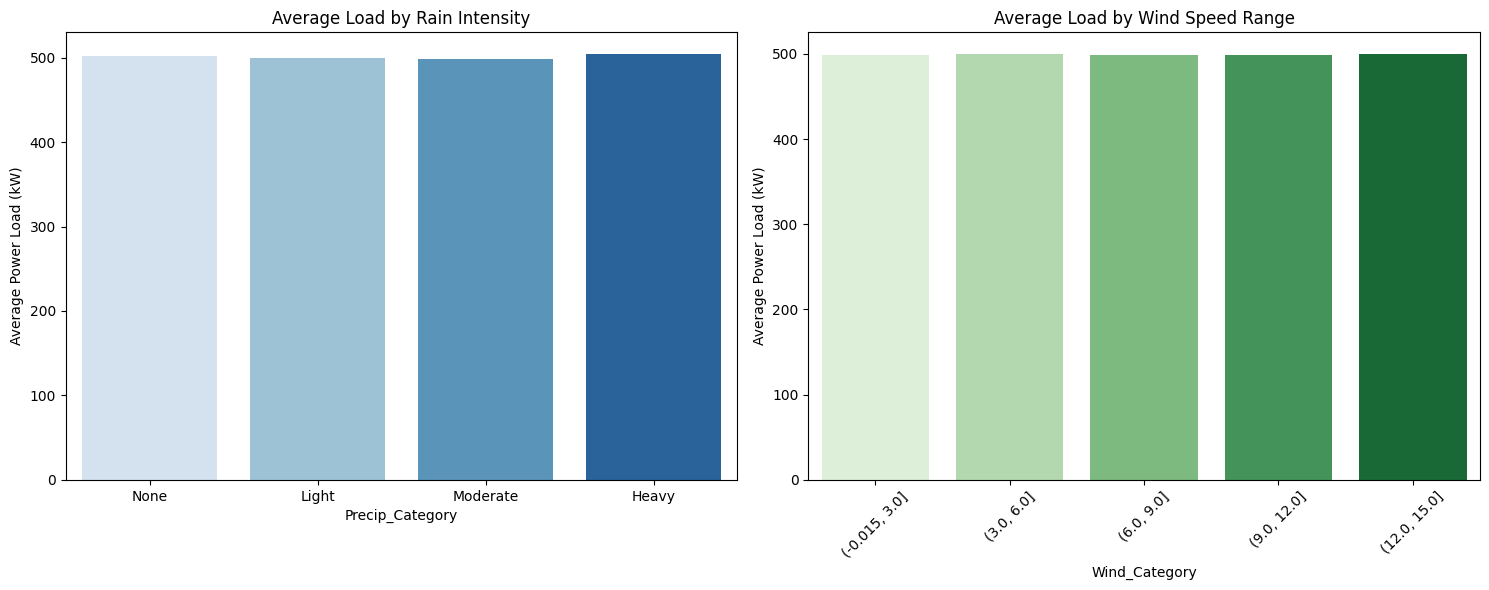

In [28]:

# For Precipitation: Since it's skewed (packed at 0), we make specific bins
# We want to see: No Rain (0), Light Rain (0-0.5), Heavy Rain (>0.5)
# Adjust the bins [0, 0.1, 1.0, 2.0] based on your max values!
precip_bins = [0, 0.01, 0.5, 1.0, 2.0]
precip_labels = ['None', 'Light', 'Moderate', 'Heavy']
df['Precip_Category'] = pd.cut(df['Precipitation_mm'], bins=precip_bins, labels=precip_labels, include_lowest=True)

# For Wind: We just split it into 5 equal chunks
df['Wind_Category'] = pd.cut(df['WindSpeed_mps'], bins=5)

# --- PLOTTING THE TRENDS ---

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Precipitation Trend
# We perform a 'barplot' which automatically calculates the Mean (Average) and shows the uncertainty line
sns.barplot(x='Precip_Category', y='Power_Load_kW', data=df, ax=axes[0], palette="Blues", errorbar=None)
axes[0].set_title('Average Load by Rain Intensity')
axes[0].set_ylabel('Average Power Load (kW)')

# Plot 2: Wind Trend
sns.barplot(x='Wind_Category', y='Power_Load_kW', data=df, ax=axes[1], palette="Greens", errorbar=None)
axes[1].set_title('Average Load by Wind Speed Range')
axes[1].set_ylabel('Average Power Load (kW)')
axes[1].tick_params(axis='x', rotation=45) # Tilt labels so they fit

plt.tight_layout()
plt.show()


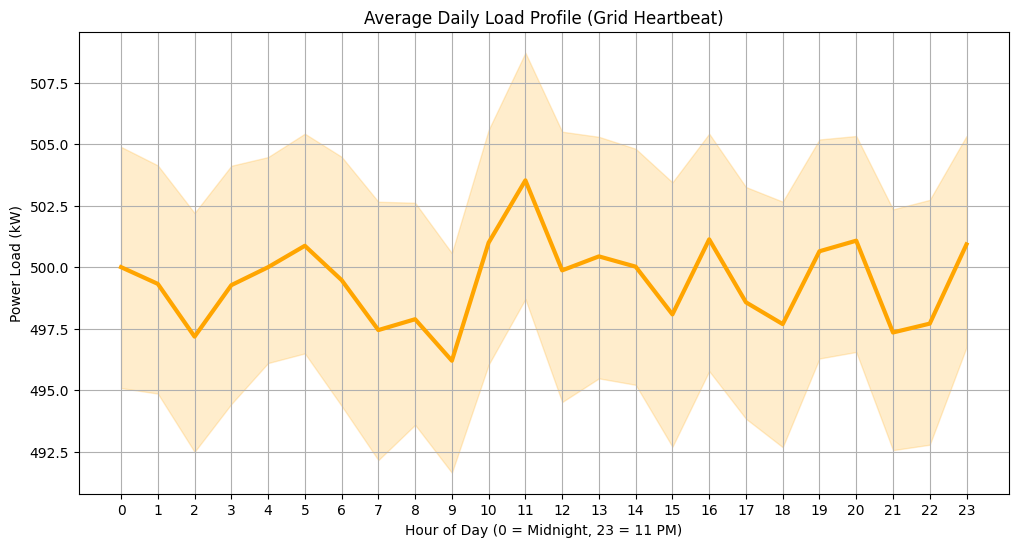

In [31]:
# 1. Ensure Timestamp is in datetime format (You already did this, but good to double check!)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 2. Extract the "Hour" from the Timestamp
# This creates a new column with just numbers 0 to 23
df['Hour'] = df['Timestamp'].dt.hour

# 3. Plot the "Average Daily Cycle"
plt.figure(figsize=(12, 6))

# We group by 'Hour' and plot the Power_Load_kW
# The line represents the average load for that specific hour across all days in your dataset.
sns.lineplot(x='Hour', y='Power_Load_kW', data=df, linewidth=3, color='orange')

plt.title('Average Daily Load Profile (Grid Heartbeat)')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)')
plt.ylabel('Power Load (kW)')
plt.xticks(range(0, 24)) # Show every hour tick
plt.grid(True)

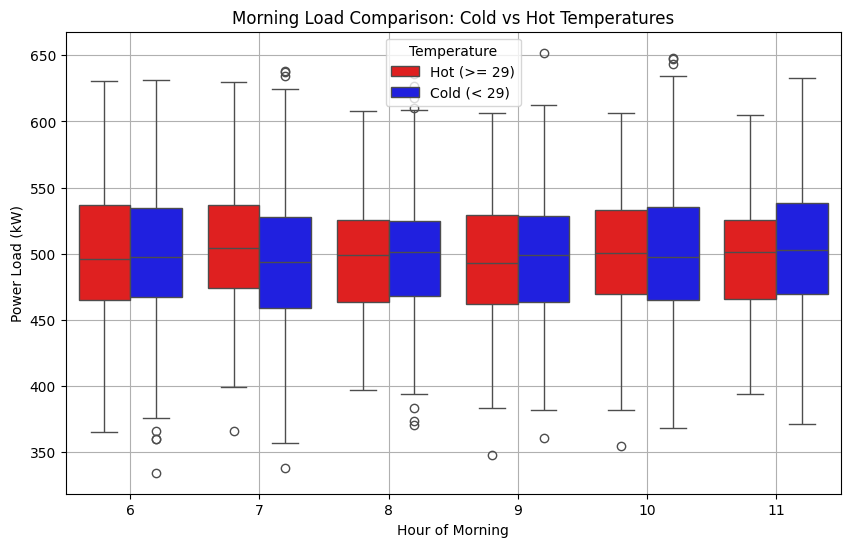

In [33]:


# 1. Setup the Data (Assuming df is already loaded)
# We focus ONLY on the "Ramp Up" period you found (e.g., 6 AM to 11 AM)
morning_df = df[(df['Hour'] >= 6) & (df['Hour'] <= 11)].copy()

# 2. Create the Binary Split
# We label every row as either "Under 29" or "Over 29"
morning_df['Temp_Condition'] = morning_df['Temperature_C'].apply(lambda x: 'Cold (< 29)' if x < 29 else 'Hot (>= 29)')

# 3. The Truth Visualization
plt.figure(figsize=(10, 6))

# We use a Boxplot to compare the two universes side-by-side
# Look at the Median (the line inside the box). Is one higher than the other?
sns.boxplot(x='Hour', y='Power_Load_kW', hue='Temp_Condition', data=morning_df, palette={'Cold (< 29)': 'blue', 'Hot (>= 29)': 'red'})

plt.title('Morning Load Comparison: Cold vs Hot Temperatures')
plt.xlabel('Hour of Morning')
plt.ylabel('Power Load (kW)')
plt.legend(title='Temperature')
plt.grid(True)
plt.show()

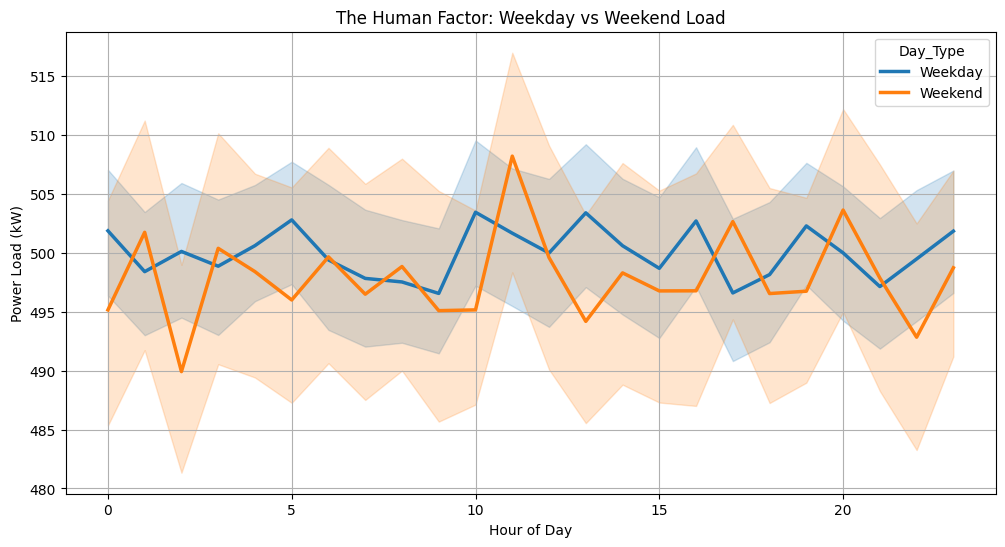

In [34]:

# 1. Prepare Data (Ensure 'Timestamp' is datetime)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day_Type'] = df['Timestamp'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df['Hour'] = df['Timestamp'].dt.hour

# 2. Plot: Weekday vs Weekend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Power_Load_kW', hue='Day_Type', data=df, linewidth=2.5)

plt.title('The Human Factor: Weekday vs Weekend Load')
plt.xlabel('Hour of Day')
plt.ylabel('Power Load (kW)')
plt.grid(True)
plt.show()

<h1> Inertia, mau tambahin apa kagak

Inertia Statistics:
count    6060.000000
mean        0.146594
std        47.160025
min      -233.580000
10%       -52.137000
25%       -23.360000
50%         0.580000
75%        24.016250
90%        53.371500
max       258.690000
Name: Inertia, dtype: float64


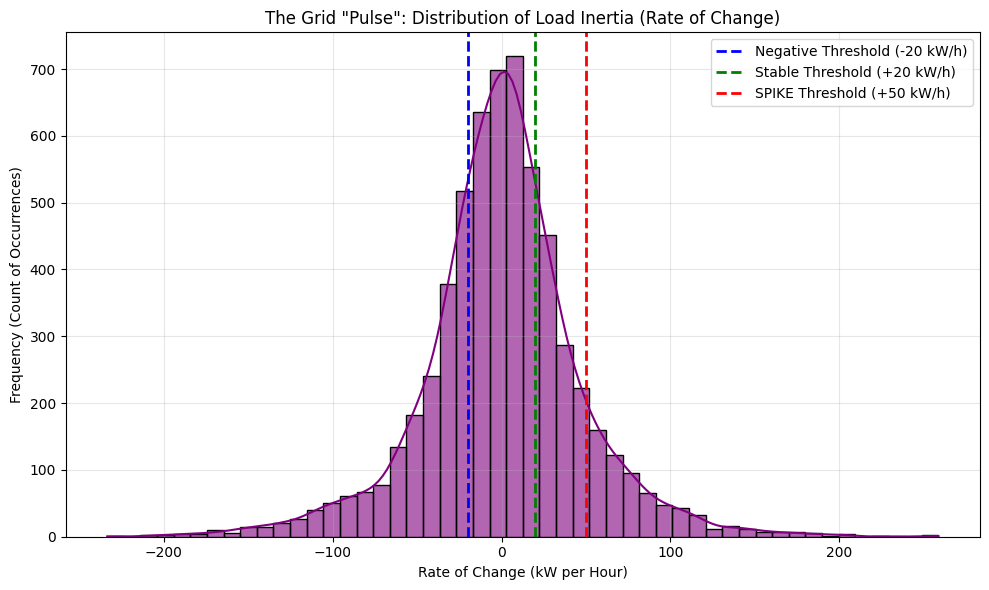

In [35]:


# Load the dataset
df = pd.read_csv('PowerLoad_Dataset.csv')

# 1. Prepare Data (Timestamp & Sorting)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

# 2. Feature Engineering: Inertia (Rate of Change)
# Calculate time difference in hours
df['Time_Diff_Hours'] = df['Timestamp'].diff().dt.total_seconds() / 3600
# Calculate load difference
df['Load_Diff'] = df['Power_Load_kW'].diff()
# Calculate Inertia (kW per Hour)
df['Inertia'] = df['Load_Diff'] / df['Time_Diff_Hours']

# 3. Clean Data for Visualization
# Remove NaN (first row) and huge time gaps (e.g. > 4 hours) which distort the rate
df_clean = df[(df['Time_Diff_Hours'] > 0) & (df['Time_Diff_Hours'] <= 4)].copy()

# 4. Calculate Statistics for Boundaries
stats = df_clean['Inertia'].describe(percentiles=[0.1, 0.25, 0.75, 0.9])

# 5. Plot the Bell Curve (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Inertia'], bins=50, kde=True, color='purple', alpha=0.6)

# Add vertical lines for the proposed Fuzzy Boundaries
# Using the 10th and 90th percentiles roughly for the "Spike" definitions
boundary_neg = -20  # Approximate based on previous analysis
boundary_pos = 20   # Approximate based on previous analysis
boundary_spike = 50 # Approximate based on previous analysis

plt.axvline(x=boundary_neg, color='blue', linestyle='--', linewidth=2, label='Negative Threshold (-20 kW/h)')
plt.axvline(x=boundary_pos, color='green', linestyle='--', linewidth=2, label='Stable Threshold (+20 kW/h)')
plt.axvline(x=boundary_spike, color='red', linestyle='--', linewidth=2, label='SPIKE Threshold (+50 kW/h)')

plt.title('The Grid "Pulse": Distribution of Load Inertia (Rate of Change)')
plt.xlabel('Rate of Change (kW per Hour)')
plt.ylabel('Frequency (Count of Occurrences)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('inertia_bell_curve.png')

print("Inertia Statistics:")
print(stats)